In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned stats
nta_cleaned = pd.read_csv("data/nta_fine_stats_cleaned.csv")

# Load for choropleth
geo_merged = gpd.read_file("data/nta_with_fine_stats.geojson")


## 📈 Cell 1: Visualize Top 10 Neighborhoods by Fine Density
This creates a horizontal bar chart using Seaborn, showing the top 10 NYC neighborhoods with the most fines per 1,000 people.
It helps communicate which areas have the most intense fine activity relative to population.

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/2225916080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')


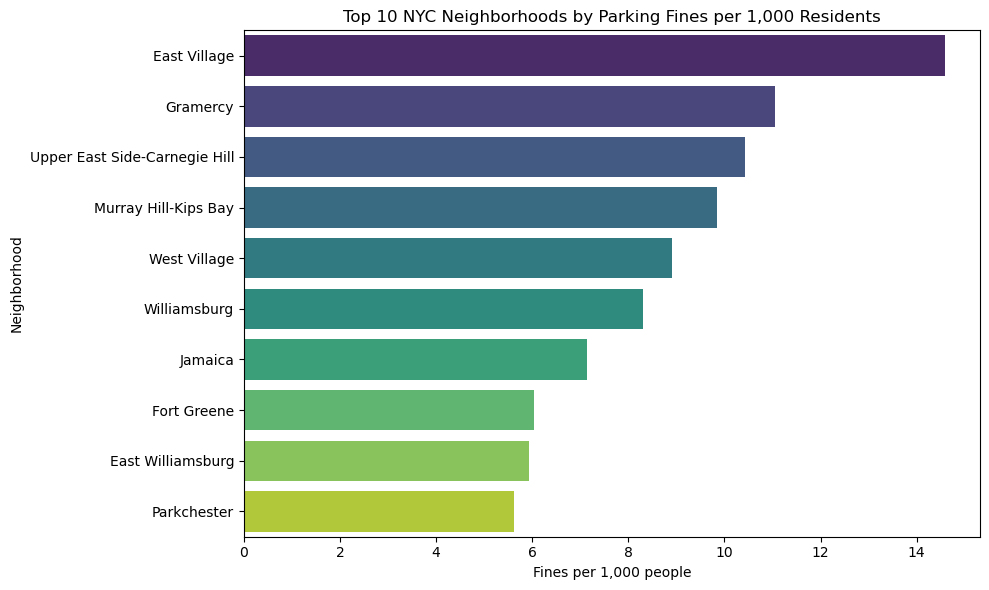

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = nta_cleaned.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')
plt.title("Top 10 NYC Neighborhoods by Parking Fines per 1,000 Residents")
plt.xlabel("Fines per 1,000 people")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()



## 📆 Cell 2: Monthly Trends in Parking Violations

This bar chart displays the number of parking violations in NYC by month, offering a temporal view of fine frequency throughout the year.
It allows us to spot seasonal patterns such as spikes in the summer months highlighting when enforcement is most active or violations are more common.


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/2647883938.py:2: DtypeWarning: Columns (18,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("full_geocoded_parking_fines.csv")
/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/2647883938.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_counts, x='month', y='count', palette='Blues_d')


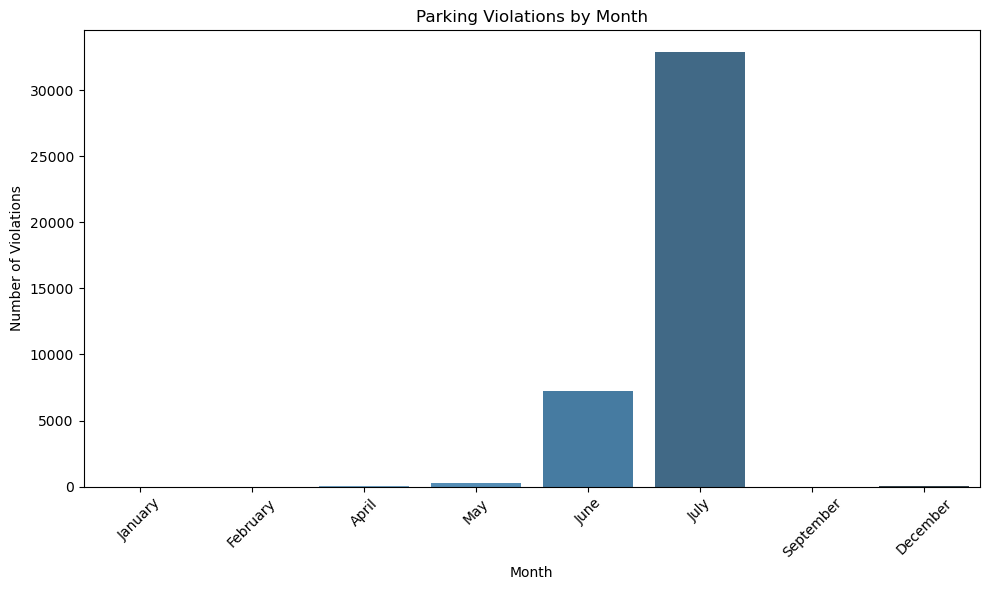

In [ ]:
# Load the full geocoded fines dataset
df = pd.read_csv("full_geocoded_parking_fines.csv")

# Ensure issue_date is datetime
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df = df[df['issue_date'].notna()]

# Extract month for each fine
df['month'] = df['issue_date'].dt.strftime('%B')
df['month_num'] = df['issue_date'].dt.month

# Group and sort by month
monthly_counts = df.groupby(['month', 'month_num']).size().reset_index(name='count')
monthly_counts = monthly_counts.sort_values(by='month_num')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts, x='month', y='count', palette='Blues_d')
plt.title("Parking Violations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Cell 3: Parking Violations by Weekday

This plot breaks down total parking violations across each day of the week.
It highlights clear temporal trends Fridays lead in violations, while weekends, especially Sundays, see significantly fewer tickets suggesting a pattern in both parking behavior and enforcement.


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/1185857380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = df.groupby('weekday').size().reset_index(name='count')


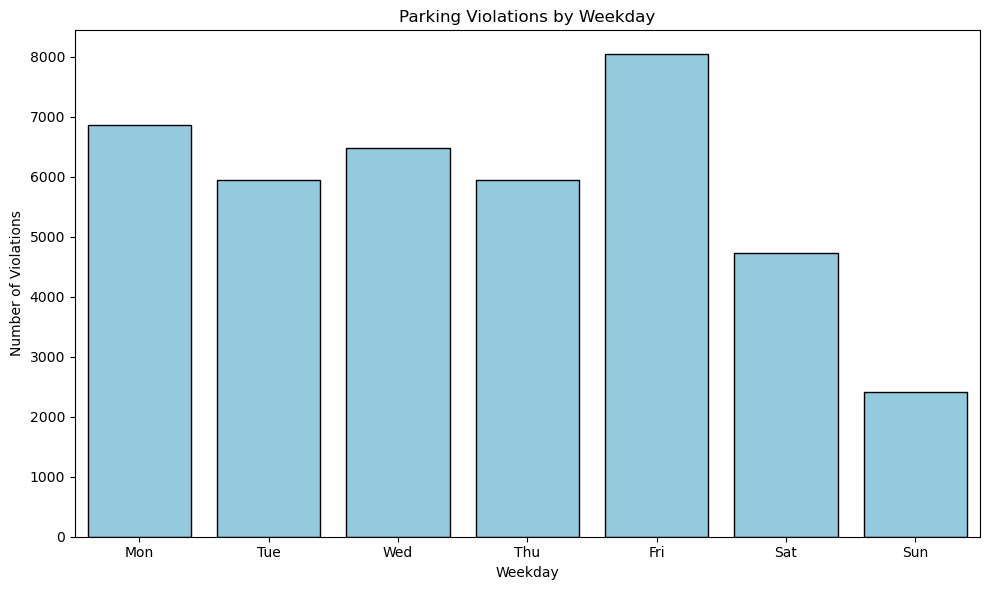

In [37]:

# Extract weekday (abbreviated) from date
df['weekday'] = df['issue_date'].dt.day_name().str[:3]
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# Count violations per weekday
weekday_counts = df.groupby('weekday').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_counts, x='weekday', y='count', color="skyblue", edgecolor="black")
plt.title("Parking Violations by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Violations")
plt.tight_layout()
plt.show()


## 🕒 Cell 4: Parking Violations by Hour of Day

This plot shows the distribution of parking violations across each hour of the day (0–23).
It reveals a clear surge in ticketing during morning hours especially between 7 AM and noon highlighting likely enforcement patterns and commuting behavior in NYC.

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/1725820600.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_counts, x='violation_hour', y='Count', palette='mako')


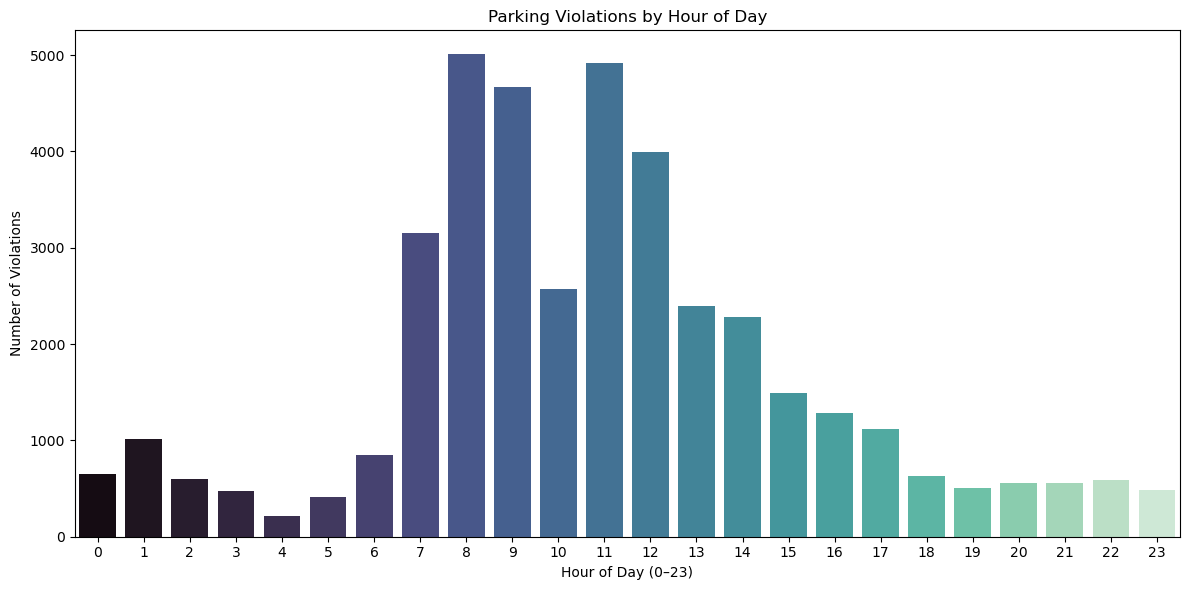

In [38]:
# Ensure 'violation_time' is present and clean
df = df[df['violation_time'].notna()].copy()

# Clean and convert time to hour format
def extract_hour(vtime):
    try:
        # Standardize to 24h: '1030A' -> 10, '0930P' -> 21
        hour = int(vtime[:2])
        if 'P' in vtime and hour != 12:
            hour += 12
        elif 'A' in vtime and hour == 12:
            hour = 0
        return hour
    except:
        return None

df['violation_hour'] = df['violation_time'].astype(str).apply(extract_hour)
df = df[df['violation_hour'].notna()]

# Group by hour
hourly_counts = df.groupby('violation_hour').size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_counts, x='violation_hour', y='Count', palette='mako')
plt.title("Parking Violations by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Violations")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 🕘 Cell 5: Polar Plot of Hourly Parking Violations

This polar bar chart visualizes NYC parking violations over a 24-hour cycle, showing the distribution of fines by hour.
It highlights peak activity in the morning and midday hours, with the highest intensity between 7 AM and noon suggesting when enforcement is most active.

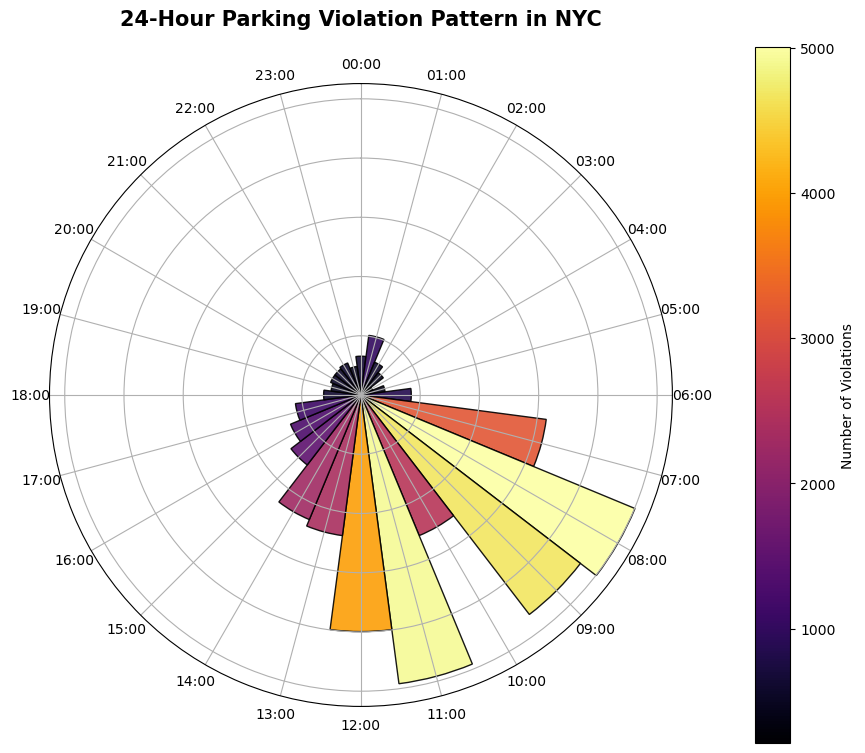

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


hourly_violations = df['violation_hour'].value_counts().sort_index()

# Ensure 24 bins
all_hours = pd.Series(0, index=range(24))
hourly_violations = all_hours.add(hourly_violations, fill_value=0)

# Angles and polar plot setup
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': 'polar'})

# Normalize for color
norm = plt.Normalize(vmin=hourly_violations.min(), vmax=hourly_violations.max())
colors = cm.inferno(norm(hourly_violations.values))

# Bar chart
bars = ax.bar(angles, hourly_violations.values, width=np.pi/12, bottom=0,
              color=colors, alpha=0.9, edgecolor="black")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm.inferno, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label("Number of Violations")

# Ticks & formatting
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels([f"{h:02d}:00" for h in range(24)], fontsize=10)
ax.set_yticklabels([])  # Hide radial labels to reduce clutter

# Shift title lower to avoid collision
ax.set_title("24-Hour Parking Violation Pattern in NYC", fontsize=15, fontweight="bold", y=1.08)

plt.tight_layout()
plt.show()


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/3981999991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_violations, x='Count', y='Violation Type', palette='rocket')


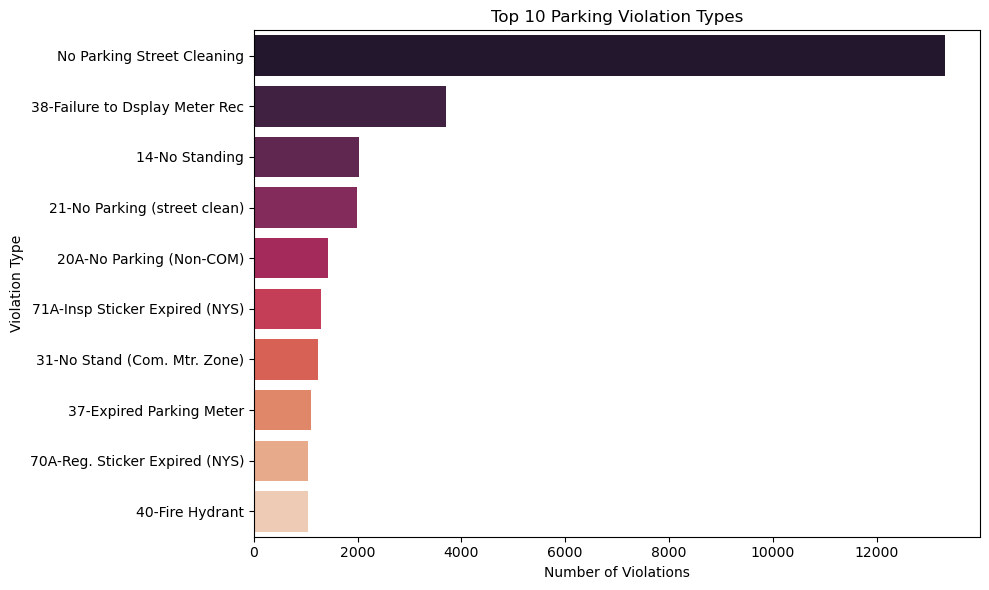

In [46]:
top_violations = df['violation_description'].value_counts().head(10).reset_index()
top_violations.columns = ['Violation Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_violations, x='Count', y='Violation Type', palette='rocket')
plt.title("Top 10 Parking Violation Types")
plt.xlabel("Number of Violations")
plt.ylabel("Violation Type")
plt.tight_layout()
plt.show()


In [77]:
import folium
from folium.plugins import HeatMap
from matplotlib import cm, colors
from IPython.display import display

# Get top 5 violation types
top_violations = df['violation_description'].value_counts().head(5).index.tolist()

# Create base map
nyc_map = folium.Map(location=[40.75, -73.93], zoom_start=12, control_scale=True)

# Generate color map
colormap = cm.get_cmap('Set1', len(top_violations))
color_norm = colors.Normalize(vmin=0, vmax=len(top_violations) - 1)

for i, v_type in enumerate(top_violations):
    subset = df[df['violation_description'] == v_type].dropna(subset=['lat', 'lon'])

    if subset.shape[0] < 50:
        continue

    # Get RGB hex color from colormap
    rgb = colormap(color_norm(i))[:3]
    hex_color = colors.rgb2hex(rgb)

    # Create a feature group for this violation
    fg = folium.FeatureGroup(name=v_type)

    # Add semi-transparent CircleMarkers as proxy heat "dots"
    for _, row in subset.sample(n=min(500, len(subset))).iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=3,
            color=hex_color,
            fill=True,
            fill_color=hex_color,
            fill_opacity=0.4,
            opacity=0.3
        ).add_to(fg)

    fg.add_to(nyc_map)

# Add layer control
folium.LayerControl().add_to(nyc_map)

from branca.element import Template, MacroElement

legend_items = ""
for i, v_type in enumerate(top_violations):
    rgb = colormap(color_norm(i))[:3]
    hex_color = colors.rgb2hex(rgb)
    legend_items += f"""
        <li style="margin-bottom:4px;">
            <span style="background:{hex_color};
                         width:14px; height:14px;
                         display:inline-block; border-radius:50%;
                         margin-right:8px;"></span>{v_type}
        </li>
    """

legend_html = f"""
{{% macro html(this, kwargs) %}}
<div style="position: fixed; 
            bottom: 30px; left: 30px; width: 250px; 
            z-index:9999; font-size:14px;
            background-color: white;
            padding: 10px;
            border: 1px solid lightgray;
            border-radius: 5px;">
    <b style="font-size:16px;">Violation Types (Color Key)</b>
    <ul style="list-style: none; padding-left: 0; margin-top: 10px;">
        {legend_items}
    </ul>
</div>
{{% endmacro %}}
"""

legend = MacroElement()
legend._template = Template(legend_html)
nyc_map.get_root().add_child(legend)


# Display map inline
display(nyc_map)


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/2982175417.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set1', len(top_violations))


In [74]:
import folium
from folium import FeatureGroup, Map
from matplotlib import cm, colors
from IPython.display import display
from branca.element import Template, MacroElement

# Sample top 5 violation types
top_violations = df['violation_description'].value_counts().head(5).index.tolist()

# Base map
nyc_map = Map(location=[40.75, -73.93], zoom_start=12, control_scale=True)

# Color mapping
colormap = cm.get_cmap('Set1', len(top_violations))
color_norm = colors.Normalize(vmin=0, vmax=len(top_violations) - 1)

# Create a dict to keep reference of feature group names
layer_refs = []
legend_items = ""

for i, v_type in enumerate(top_violations):
    color_rgb = colormap(color_norm(i))[:3]
    hex_color = colors.rgb2hex(color_rgb)

    # Generate a clean JS-safe layer ID
    layer_name = f"layer_{i}"
    fg = FeatureGroup(name=layer_name)
    layer_refs.append((layer_name, v_type))

    for _, row in df[df['violation_description'] == v_type].dropna(subset=['lat', 'lon']).sample(n=500).iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=3,
            color=hex_color,
            fill=True,
            fill_color=hex_color,
            fill_opacity=0.4,
            opacity=0.3
        ).add_to(fg)

    fg.add_to(nyc_map)

    # HTML for legend
    legend_items += f"""
        <li>
            <input type="checkbox" id="{layer_name}" checked>
            <span style="background:{hex_color};
                         width:12px;height:12px;
                         display:inline-block;
                         margin-right:6px;
                         border-radius:50%;"></span>
            {v_type}
        </li>
    """

# JavaScript for toggling layers
layer_js = "\n".join([
    f"""
    var checkbox = document.getElementById('{layer_id}');
    checkbox.onchange = function() {{
        var target = Object.values(map._layers).find(l => l.options.pane && l._eventParents && Object.keys(l._eventParents).some(k => k.includes('{layer_id}')));
        if (this.checked) {{
            map.addLayer(target);
        }} else {{
            map.removeLayer(target);
        }}
    }};
    """
    for layer_id, _ in layer_refs
])

# Final template
legend_html = f"""
{{% macro html(this, kwargs) %}}
<div style="position: fixed; top: 30px; right: 30px; width: 320px; 
            z-index:9999; font-size:14px; background-color: white;
            padding: 12px 15px; border: 1px solid lightgray;
            border-radius: 6px; box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
    <b style="font-size:16px;">Top 5 Parking Violations</b>
    <ul style="list-style: none; padding-left: 0; margin-top: 10px;">
        {legend_items}
    </ul>
</div>

<script>
{layer_js}
</script>
{{% endmacro %}}
"""

legend = MacroElement()
legend._template = Template(legend_html)
nyc_map.get_root().add_child(legend)

display(nyc_map)


/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/3468308168.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set1', len(top_violations))
